Distances (Label, Euclidean, Manhattan, Minkowski):
('Orange', 5.024937810560445, 5.5, 5.001666111419547)
('Apple', 5.024937810560445, 5.5, 5.001666111419547)
('Apple', 15.074813431681335, 16.5, 15.00499833425864)
('Orange', 15.074813431681335, 16.5, 15.00499833425864)
('Orange', 25.124689052802225, 27.5, 25.008330557097732)
('Apple', 35.00357124637428, 35.5, 35.00003401357238)

The label for the new fruit is: Apple


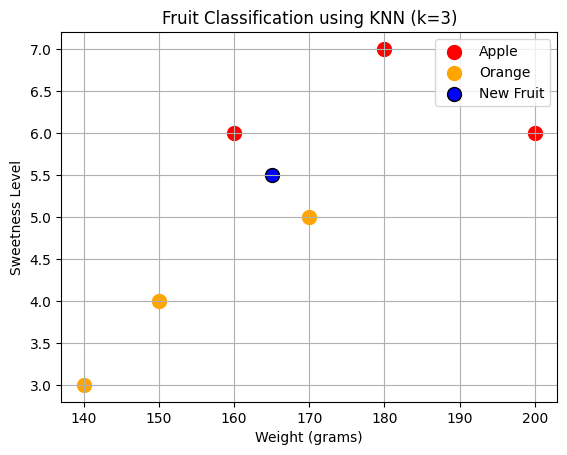

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([
    [180, 7, "Apple"],
    [200, 6, "Apple"],
    [150, 4, "Orange"],
    [170, 5, "Orange"],
    [160, 6, "Apple"],
    [140, 3, "Orange"]
])
new_fruit = np.array([165, 5.5])
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))
def minkowski_distance(x1, x2, p=3):
    return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)
distances = []
for i in range(len(data)):
    point = np.array([float(data[i][0]), float(data[i][1])])
    euclidean = euclidean_distance(new_fruit, point)
    manhattan = manhattan_distance(new_fruit, point)
    minkowski = minkowski_distance(new_fruit, point)
    distances.append((data[i][2], euclidean, manhattan, minkowski))

#using euclidean
distances.sort(key=lambda x: x[1])
k_nearest_neighbors = distances[:3]
labels = [neighbor[0] for neighbor in k_nearest_neighbors]
label = max(set(labels), key=labels.count)
print("Distances (Label, Euclidean, Manhattan, Minkowski):")
for neighbor in distances:
    print(neighbor)
print(f"\nThe label for the new fruit is: {label}")

apple_points = np.array([[float(row[0]), float(row[1])] for row in data if row[2] == "Apple"])
orange_points = np.array([[float(row[0]), float(row[1])] for row in data if row[2] == "Orange"])

plt.scatter(apple_points[:, 0], apple_points[:, 1], color='red', label='Apple', s=100)
plt.scatter(orange_points[:, 0], orange_points[:, 1], color='orange', label='Orange', s=100)

plt.scatter(new_fruit[0], new_fruit[1], color='blue', label='New Fruit', s=100, edgecolor='black')

plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.title('Fruit Classification using KNN (k=3)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import math

# Sample data
data = [
    {"Age": 30, "BP": "High", "Cholesterol": "High", "Diagnosis": "Sick"},
    {"Age": 45, "BP": "Low", "Cholesterol": "Normal", "Diagnosis": "Healthy"},
    {"Age": 50, "BP": "High", "Cholesterol": "High", "Diagnosis": "Sick"},
    {"Age": 35, "BP": "Low", "Cholesterol": "Normal", "Diagnosis": "Healthy"},
    {"Age": 60, "BP": "High", "Cholesterol": "High", "Diagnosis": "Sick"},
    {"Age": 55, "BP": "Low", "Cholesterol": "Normal", "Diagnosis": "Healthy"},
    {"Age": 40, "BP": "High", "Cholesterol": "High", "Diagnosis": "Sick"},
    {"Age": 25, "BP": "Low", "Cholesterol": "Normal", "Diagnosis": "Healthy"},
    {"Age": 65, "BP": "High", "Cholesterol": "High", "Diagnosis": "Sick"},
    {"Age": 45, "BP": "Low", "Cholesterol": "Normal", "Diagnosis": "Healthy"}
]

# Define a class for tree nodes
class TreeNode:
    def __init__(self, feature=None, label=None):
        self.feature = feature  # The feature this node splits on
        self.label = label  # If this is a leaf, it holds the label
        self.children = {}  # Dictionary to hold branches (subtrees) for each feature value

    def add_child(self, value, node):
        self.children[value] = node

    def is_leaf(self):
        return self.label is not None

# Helper function to calculate entropy
def calculate_entropy(data, target_attribute):
    total = len(data)
    counts = {}
    for entry in data:
        label = entry[target_attribute]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1

    entropy = 0
    for label in counts:
        probability = counts[label] / total
        entropy -= probability * math.log2(probability)
    return entropy

# Helper function to calculate information gain
def calculate_information_gain(data, attribute, target_attribute):
    total_entropy = calculate_entropy(data, target_attribute)
    total = len(data)

    # Partition data by attribute values
    partitions = {}
    for entry in data:
        value = entry[attribute]
        if value not in partitions:
            partitions[value] = []
        partitions[value].append(entry)

    # Calculate weighted entropy
    weighted_entropy = 0
    for partition in partitions.values():
        partition_entropy = calculate_entropy(partition, target_attribute)
        weighted_entropy += (len(partition) / total) * partition_entropy

    # Information gain
    information_gain = total_entropy - weighted_entropy
    return information_gain

# Function to build the decision tree using TreeNode class
def id3(data, features, target_attribute):
    # Check if all examples have the same label
    labels = [entry[target_attribute] for entry in data]
    if labels.count(labels[0]) == len(labels):
        return TreeNode(label=labels[0])

    # If no features left to split, return the most common label
    if not features:
        majority_label = max(set(labels), key=labels.count)
        return TreeNode(label=majority_label)

    # Choose the feature with the highest information gain
    gains = {feature: calculate_information_gain(data, feature, target_attribute) for feature in features}
    best_feature = max(gains, key=gains.get)

    # Create the tree node with the best feature
    root = TreeNode(feature=best_feature)
    partitions = {}
    for entry in data:
        value = entry[best_feature]
        if value not in partitions:
            partitions[value] = []
        partitions[value].append(entry)

    # Remove the chosen feature from the list of features
    remaining_features = [f for f in features if f != best_feature]

    # Recursively build the tree for each partition and add it as a child
    for value, subset in partitions.items():
        child_node = id3(subset, remaining_features, target_attribute)
        root.add_child(value, child_node)

    return root

# Function to predict using the decision tree
def predict(tree, sample):
    if tree.is_leaf():
        return tree.label
    feature_value = sample.get(tree.feature)
    child = tree.children.get(feature_value)
    if child is None:
        return "Unknown"  # Handle cases where the feature value was not in training data
    return predict(child, sample)

# Pretty print the tree
def print_tree(node, level=0):
    if node.is_leaf():
        print("  " * level + f"Leaf: {node.label}")
    else:
        print("  " * level + f"[Feature: {node.feature}]")
        for value, child in node.children.items():
            print("  " * (level + 1) + f"Value = {value}")
            print_tree(child, level + 2)

# Build and print the decision tree
features = ["Age", "BP", "Cholesterol"]
decision_tree = id3(data, features, "Diagnosis")
print("Decision Tree:")
print_tree(decision_tree)

# Predict for a 50-year-old patient with low blood pressure and normal cholesterol
sample_patient = {"Age": 50, "BP": "Low", "Cholesterol": "Normal"}
prediction = predict(decision_tree, sample_patient)
print("\nPrediction for the sample patient:", prediction)


Decision Tree:
[Feature: Age]
  Value = 30
    Leaf: Sick
  Value = 45
    Leaf: Healthy
  Value = 50
    Leaf: Sick
  Value = 35
    Leaf: Healthy
  Value = 60
    Leaf: Sick
  Value = 55
    Leaf: Healthy
  Value = 40
    Leaf: Sick
  Value = 25
    Leaf: Healthy
  Value = 65
    Leaf: Sick

Prediction for the sample patient: Sick
